# <과제 2> 유방암 데이터 - 차원축소, 군집화
- 축소할 차원: 10, 5, 2 
- 원본과 차원축소한 데이터의 분류(앙상블), 정확도 측정
- 군집화 하기
- 2차원 차원축소 데이터 시각화 (오리지날, 군집 데이터)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
def pca_accuaracy(X, y):
  X_train,X_test,y_train,y_test=train_test_split(X, y, stratify = y, random_state=2022)
  score = RandomForestClassifier(random_state=2022).fit(X_train, y_train ).score(X_test, y_test)
  return score

- 차원 축소 및 데이터의 분류(앙상블) 정확도 측정

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
# 유방암 데이터 
cancer = load_breast_cancer() 
# 표준화
cancer_std = StandardScaler().fit_transform(cancer.data)

In [35]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
P = []
# 차원 축소 및 정확도 
for n in [10, 5, 2]:
  pca = PCA(n)
  cancer_pca = pca.fit_transform(cancer_std) 
  explained = pca.explained_variance_ratio_.sum() # 설명력
  acc = pca_accuaracy(cancer_pca, cancer.target)  # 정확도 
  
  P.append(cancer_pca)
  print(f'[ {n} 차원 ] \n 설명력 - {explained:.4f}, 정확도 - {acc:.4f}')

[ 10 차원 ] 
 설명력 - 0.9516, 정확도 - 0.9371
[ 5 차원 ] 
 설명력 - 0.8473, 정확도 - 0.9580
[ 2 차원 ] 
 설명력 - 0.6324, 정확도 - 0.9580


- 군집화 및 2차원 차원축소 데이터 시각화 (오리지날, 군집 데이터)


In [37]:
from sklearn.cluster import KMeans
# 군집화
kmeans = KMeans(n_clusters=3, random_state=2022).fit(cancer_std)
kmeans

KMeans(n_clusters=3, random_state=2022)

In [40]:
# DataFrame으로 만들기 
df = pd.DataFrame({
     'PC1': P[2][:,0], # P[2] : 2차원 cancer_pca
     'PC2': P[2][:,1] ,
     'target': cancer.target,
     'cluster': kmeans.labels_
})
df.head(55).tail(5)

,PC1,PC2,target,cluster
50,-3.542906,-1.282496,1,0
51,-3.157814,-1.688959,1,0
52,-3.450489,-0.498219,1,0
53,3.302551,-1.130938,0,1
54,-0.674619,-2.116410,0,0


In [43]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

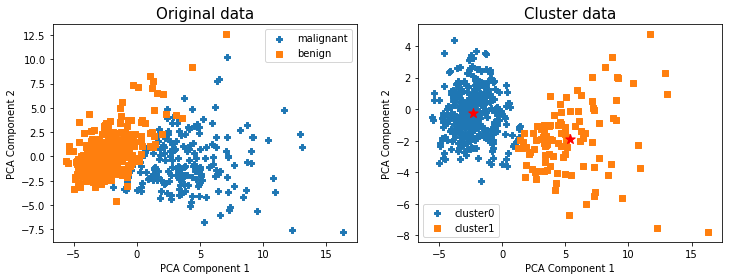

In [48]:
plt.figure(figsize=(12,4))
markers = ['P','s']
for k, column in enumerate(['target', 'cluster']):
  plt.subplot(1, 2, k+1) 
  for i, marker in enumerate(markers):
    x_data = df[df[column] == i]['PC1']
    y_data = df[df[column]  == i]['PC2']
    
    if k == 0:
      plt.title('Original data', fontsize=15)
      plt.scatter(x_data, y_data, marker=marker, label=cancer.target_names[i])
    else:
      plt.title('Cluster data', fontsize=15)
      plt.scatter(x_data, y_data, marker=marker, label='cluster'+str(i))
      plt.scatter(x_data.mean(), y_data.mean(), marker='*', c='red', s=100) # 중심점 그리기 (원본데이터는 표기 필요 없음)

  plt.legend()
  plt.xlabel('PCA Component 1'), plt.ylabel('PCA Component 2')
plt.show()